In [1]:
# AeroCNN-I
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import datetime
%matplotlib inline

In [2]:
n_units=512
l2Regularizer=1e-09
kernel_size = 2
n_grid = 101
strides = 2
input_size = 49

In [3]:
alpha = np.array([-10, -2, -4, -6, -8, 0, 10, 12, 14, 16, 18, 20, 2, 4, 6, 8])

In [4]:
alpha_train = alpha[-7:-4].reshape((3, 1))
alpha_test = alpha[-4:].reshape((4,1))

In [5]:
aa_train = np.zeros((3*113,1))
for i in range(0, 113):
    aa_train[3*i:3*(i+1), :] = alpha_train[:,:]
aa_test = np.zeros((4*113,1))
for i in range(0, 113):
    aa_test[4*i:4*(i+1), :] = alpha_test[:,:]

In [6]:
aa_train.shape

(339, 1)

In [7]:
aa_test.shape

(452, 1)

In [8]:
aa_train = aa_train.reshape((113*3,1,1))
aa_test = aa_test.reshape((113*4,1,1))

In [9]:
os.chdir('D:\\')

In [10]:
data = pd.read_csv('datasetList.csv', header=None)

In [11]:
x = data.iloc[:, 0].values

In [12]:
x = x.reshape((1,113))
x_train = np.vstack((x,x,x))
x_test = np.vstack((x,x,x,x))
geo_train = x_train.T.reshape((113*3,1))
geo_test = x_test.T.reshape((113*4,1))

In [13]:
geo_train

array([['NACA0006'],
       ['NACA0006'],
       ['NACA0006'],
       ['NACA0008'],
       ['NACA0008'],
       ['NACA0008'],
       ['NACA0009'],
       ['NACA0009'],
       ['NACA0009'],
       ['NACA0010'],
       ['NACA0010'],
       ['NACA0010'],
       ['NACA0012'],
       ['NACA0012'],
       ['NACA0012'],
       ['NACA0015'],
       ['NACA0015'],
       ['NACA0015'],
       ['NACA0018'],
       ['NACA0018'],
       ['NACA0018'],
       ['NACA0021'],
       ['NACA0021'],
       ['NACA0021'],
       ['NACA0024'],
       ['NACA0024'],
       ['NACA0024'],
       ['NACA747a315'],
       ['NACA747a315'],
       ['NACA747a315'],
       ['NACA747a415'],
       ['NACA747a415'],
       ['NACA747a415'],
       ['NACA000834'],
       ['NACA000834'],
       ['NACA000834'],
       ['NACA001034'],
       ['NACA001034'],
       ['NACA001034'],
       ['NACA001035'],
       ['NACA001035'],
       ['NACA001035'],
       ['NACA001064'],
       ['NACA001064'],
       ['NACA001064'],
       ['NACA

In [14]:
os.chdir('D:\\airfoilInputs')

In [15]:
path = 'D:\\airfoilInputs\\'
file_list = os.listdir('D:\\airfoilInputs')
file_list_py = [file for file in file_list if file.endswith('.dat')]
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_table(path + i, sep='\s+', header=None)
    print(data.shape)
    df = pd.concat([df, data], axis=0)

(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)


In [16]:
file_list_py

['naca0006.dat',
 'naca0008.dat',
 'naca000834.dat',
 'naca0009.dat',
 'naca0010.dat',
 'naca001034.dat',
 'naca001035.dat',
 'naca001064.dat',
 'naca001065.dat',
 'naca001066.dat',
 'naca0012.dat',
 'naca001234.dat',
 'naca001264.dat',
 'naca0015.dat',
 'naca0018.dat',
 'naca0021.dat',
 'naca0024.dat',
 'naca1408.dat',
 'naca1410.dat',
 'naca1412.dat',
 'naca16006.dat',
 'naca16009.dat',
 'naca16012.dat',
 'naca16015.dat',
 'naca16018.dat',
 'naca16021.dat',
 'naca23012.dat',
 'naca23015.dat',
 'naca23018.dat',
 'naca23021.dat',
 'naca23024.dat',
 'naca2408.dat',
 'naca2410.dat',
 'naca2411.dat',
 'naca2412.dat',
 'naca2415.dat',
 'naca2418.dat',
 'naca2421.dat',
 'naca2424.dat',
 'naca4412.dat',
 'naca4415.dat',
 'naca4418.dat',
 'naca4421.dat',
 'naca4424.dat',
 'naca63010a.dat',
 'naca63012a.dat',
 'naca63015a.dat',
 'naca631212.dat',
 'naca631412.dat',
 'naca63206.dat',
 'naca63209.dat',
 'naca63210.dat',
 'naca632215.dat',
 'naca632415.dat',
 'naca632615.dat',
 'naca633018.dat',


In [17]:
out = df.iloc[:, :].values

In [18]:
out.shape # 49(point 개수))*113(데이터셋 개수)//2: x, y coordinate

(5537, 2)

In [19]:
out_train = np.vstack((out,out,out))
out_test = np.vstack((out,out,out,out))

In [20]:
out_train = out_train.reshape((113*3,49,2))
out_test = out_test.reshape((113*4,49,2))

In [21]:
os.chdir('D:\\airfoilOutputs')

In [22]:
path = 'D:\\airfoilOutputs\\'
file_list = os.listdir('D:\\airfoilOutputs')
file_list_py = [file for file in file_list if file.endswith('.csv')]
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i, header=None)
    df = pd.concat([df, data], axis=0)

In [28]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for i in file_list_train_py:
    data_train = pd.read_csv(path + str(i), header=None)
    df_train = pd.concat([df_train, data_train], axis=0)
for i in file_list_test_py:
    data_test = pd.read_csv(path + str(i), header=None)
    df_test = pd.concat([df_test, data_test], axis=0)

In [29]:
file_list_train_py

['naca0006alpha16_interpolated.csv',
 'naca0006alpha18_interpolated.csv',
 'naca0006alpha20_interpolated.csv',
 'naca000834alpha16_interpolated.csv',
 'naca000834alpha18_interpolated.csv',
 'naca000834alpha20_interpolated.csv',
 'naca0008alpha16_interpolated.csv',
 'naca0008alpha18_interpolated.csv',
 'naca0008alpha20_interpolated.csv',
 'naca0009alpha16_interpolated.csv',
 'naca0009alpha18_interpolated.csv',
 'naca0009alpha20_interpolated.csv',
 'naca001034alpha16_interpolated.csv',
 'naca001034alpha18_interpolated.csv',
 'naca001034alpha20_interpolated.csv',
 'naca001035alpha16_interpolated.csv',
 'naca001035alpha18_interpolated.csv',
 'naca001035alpha20_interpolated.csv',
 'naca001064alpha16_interpolated.csv',
 'naca001064alpha18_interpolated.csv',
 'naca001064alpha20_interpolated.csv',
 'naca001065alpha16_interpolated.csv',
 'naca001065alpha18_interpolated.csv',
 'naca001065alpha20_interpolated.csv',
 'naca001066alpha16_interpolated.csv',
 'naca001066alpha18_interpolated.csv',
 'na

In [30]:
y_train = df_train.iloc[:, :].values
y_test = df_test.iloc[:, :].values

In [31]:
y_train = y_train.reshape((113*3,n_grid,n_grid))
y_test = y_test.reshape((113*4,n_grid,n_grid))

In [32]:
input_coord = tf.keras.Input(shape=(49,2))
input_alpha = tf.keras.Input(shape=(1,))
flatten = tf.keras.layers.Flatten()(input_coord)
reshape1 = tf.keras.layers.Reshape((1,))(input_alpha)
x_concat = tf.keras.layers.Concatenate(axis=1)([flatten, reshape1])

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_concat)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fifthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
output_data = tf.keras.layers.Dense(units=n_grid*n_grid, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((n_grid, n_grid))(output_data)
# MLP
sd = tf.keras.Model([input_coord, input_alpha], output_image)

In [33]:
sd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 49, 2)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 flatten (Flatten)              (None, 98)           0           ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 1)            0           ['input_2[0][0]']                
                                                                                              

In [34]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [35]:
start = datetime.datetime.now()
history = sd.fit([out_train,aa_train], y_train, epochs=5000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/5000
11/11 [==============================] - 1s 5ms/step - loss: 18.3536 - rmse: 4.2841
Epoch 2/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.9182 - rmse: 0.9582
Epoch 3/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.4930 - rmse: 0.7021
Epoch 4/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.3605 - rmse: 0.6004
Epoch 5/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.3176 - rmse: 0.5636
Epoch 6/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.3219 - rmse: 0.5674
Epoch 7/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.2934 - rmse: 0.5417
Epoch 8/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.2809 - rmse: 0.5300
Epoch 9/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.2736 - rmse: 0.5231
Epoch 10/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.2754 - rmse: 0.5247
Epoch 11/5000
11/11 [=================

11/11 [==============================] - 0s 6ms/step - loss: 0.1309 - rmse: 0.3617
Epoch 169/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1311 - rmse: 0.3621
Epoch 170/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1304 - rmse: 0.3611
Epoch 171/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1305 - rmse: 0.3612
Epoch 172/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1313 - rmse: 0.3623
Epoch 173/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1316 - rmse: 0.3628
Epoch 174/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1313 - rmse: 0.3623
Epoch 175/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1309 - rmse: 0.3618
Epoch 176/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1305 - rmse: 0.3613
Epoch 177/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1311 - rmse: 0.3620
Epoch 178/5000
11/11 [=============

11/11 [==============================] - 0s 8ms/step - loss: 0.1300 - rmse: 0.3605
Epoch 335/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1332 - rmse: 0.3649
Epoch 336/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1311 - rmse: 0.3621
Epoch 337/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1322 - rmse: 0.3636
Epoch 338/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1307 - rmse: 0.3616
Epoch 339/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1304 - rmse: 0.3611
Epoch 340/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1300 - rmse: 0.3605
Epoch 341/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1330 - rmse: 0.3646
Epoch 342/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1310 - rmse: 0.3619
Epoch 343/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1408 - rmse: 0.3753
Epoch 344/5000
11/11 [=============

11/11 [==============================] - 0s 6ms/step - loss: 0.1314 - rmse: 0.3625
Epoch 501/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1309 - rmse: 0.3618
Epoch 502/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1301 - rmse: 0.3607
Epoch 503/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1300 - rmse: 0.3605
Epoch 504/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1330 - rmse: 0.3646
Epoch 505/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1323 - rmse: 0.3637
Epoch 506/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1306 - rmse: 0.3614
Epoch 507/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1295 - rmse: 0.3598
Epoch 508/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1317 - rmse: 0.3629
Epoch 509/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1308 - rmse: 0.3616
Epoch 510/5000
11/11 [=============

11/11 [==============================] - 0s 8ms/step - loss: 0.1735 - rmse: 0.4166
Epoch 667/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1577 - rmse: 0.3972
Epoch 668/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1656 - rmse: 0.4069
Epoch 669/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1385 - rmse: 0.3721
Epoch 670/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1346 - rmse: 0.3669
Epoch 671/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1333 - rmse: 0.3651
Epoch 672/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1299 - rmse: 0.3605
Epoch 673/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1295 - rmse: 0.3598
Epoch 674/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1283 - rmse: 0.3583
Epoch 675/5000
11/11 [==============================] - 0s 7ms/step - loss: 0.1292 - rmse: 0.3595
Epoch 676/5000
11/11 [=============

11/11 [==============================] - 0s 7ms/step - loss: 0.1299 - rmse: 0.3604
Epoch 833/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1288 - rmse: 0.3589
Epoch 834/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1308 - rmse: 0.3617
Epoch 835/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1296 - rmse: 0.3600
Epoch 836/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1321 - rmse: 0.3635
Epoch 837/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1297 - rmse: 0.3602
Epoch 838/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1283 - rmse: 0.3581
Epoch 839/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1287 - rmse: 0.3588
Epoch 840/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1295 - rmse: 0.3599
Epoch 841/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1293 - rmse: 0.3596
Epoch 842/5000
11/11 [=============

11/11 [==============================] - 0s 6ms/step - loss: 0.1281 - rmse: 0.3580
Epoch 999/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1286 - rmse: 0.3587
Epoch 1000/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1320 - rmse: 0.3633
Epoch 1001/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1300 - rmse: 0.3606
Epoch 1002/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1288 - rmse: 0.3588
Epoch 1003/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1278 - rmse: 0.3575
Epoch 1004/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1271 - rmse: 0.3566
Epoch 1005/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1272 - rmse: 0.3567
Epoch 1006/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1270 - rmse: 0.3563
Epoch 1007/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1278 - rmse: 0.3575
Epoch 1008/5000
11/11 [====

11/11 [==============================] - 0s 6ms/step - loss: 0.1265 - rmse: 0.3557
Epoch 1163/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1277 - rmse: 0.3574
Epoch 1164/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1261 - rmse: 0.3552
Epoch 1165/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1257 - rmse: 0.3545
Epoch 1166/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1269 - rmse: 0.3562
Epoch 1167/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1256 - rmse: 0.3544
Epoch 1168/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1251 - rmse: 0.3538
Epoch 1169/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1262 - rmse: 0.3552
Epoch 1170/5000
11/11 [==============================] - 0s 7ms/step - loss: 0.1267 - rmse: 0.3560
Epoch 1171/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1277 - rmse: 0.3573
Epoch 1172/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.1244 - rmse: 0.3526
Epoch 1327/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1255 - rmse: 0.3543
Epoch 1328/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1234 - rmse: 0.3513
Epoch 1329/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1245 - rmse: 0.3528
Epoch 1330/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1256 - rmse: 0.3544
Epoch 1331/5000
11/11 [==============================] - 0s 7ms/step - loss: 0.1241 - rmse: 0.3523
Epoch 1332/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1243 - rmse: 0.3525
Epoch 1333/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1235 - rmse: 0.3515
Epoch 1334/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1235 - rmse: 0.3515
Epoch 1335/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1231 - rmse: 0.3509
Epoch 1336/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.1188 - rmse: 0.3447
Epoch 1491/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1173 - rmse: 0.3425
Epoch 1492/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1155 - rmse: 0.3399
Epoch 1493/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1144 - rmse: 0.3382
Epoch 1494/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1160 - rmse: 0.3405
Epoch 1495/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1155 - rmse: 0.3399
Epoch 1496/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1165 - rmse: 0.3413
Epoch 1497/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1161 - rmse: 0.3408
Epoch 1498/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1167 - rmse: 0.3416
Epoch 1499/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1148 - rmse: 0.3388
Epoch 1500/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.1129 - rmse: 0.3360
Epoch 1655/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1104 - rmse: 0.3323
Epoch 1656/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1129 - rmse: 0.3360
Epoch 1657/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1152 - rmse: 0.3394
Epoch 1658/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1155 - rmse: 0.3398
Epoch 1659/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1125 - rmse: 0.3354
Epoch 1660/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1116 - rmse: 0.3340
Epoch 1661/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1121 - rmse: 0.3348
Epoch 1662/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1102 - rmse: 0.3320
Epoch 1663/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1092 - rmse: 0.3305
Epoch 1664/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.1010 - rmse: 0.3178
Epoch 1819/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0999 - rmse: 0.3161
Epoch 1820/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0981 - rmse: 0.3131
Epoch 1821/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0989 - rmse: 0.3145
Epoch 1822/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0974 - rmse: 0.3121
Epoch 1823/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0994 - rmse: 0.3153
Epoch 1824/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0985 - rmse: 0.3138
Epoch 1825/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1019 - rmse: 0.3193
Epoch 1826/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1084 - rmse: 0.3292
Epoch 1827/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.1143 - rmse: 0.3380
Epoch 1828/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0922 - rmse: 0.3036
Epoch 1983/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0929 - rmse: 0.3048
Epoch 1984/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0962 - rmse: 0.3102
Epoch 1985/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0934 - rmse: 0.3056
Epoch 1986/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0901 - rmse: 0.3002
Epoch 1987/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0908 - rmse: 0.3013
Epoch 1988/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0931 - rmse: 0.3051
Epoch 1989/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0920 - rmse: 0.3033
Epoch 1990/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0898 - rmse: 0.2997
Epoch 1991/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0917 - rmse: 0.3029
Epoch 1992/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0892 - rmse: 0.2986
Epoch 2147/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0831 - rmse: 0.2883
Epoch 2148/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0859 - rmse: 0.2930
Epoch 2149/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0851 - rmse: 0.2918
Epoch 2150/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0827 - rmse: 0.2876
Epoch 2151/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0782 - rmse: 0.2797
Epoch 2152/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0786 - rmse: 0.2804
Epoch 2153/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0789 - rmse: 0.2808
Epoch 2154/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0796 - rmse: 0.2822
Epoch 2155/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0793 - rmse: 0.2817
Epoch 2156/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0799 - rmse: 0.2826
Epoch 2311/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0868 - rmse: 0.2946
Epoch 2312/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0916 - rmse: 0.3026
Epoch 2313/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0833 - rmse: 0.2886
Epoch 2314/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0823 - rmse: 0.2868
Epoch 2315/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0821 - rmse: 0.2866
Epoch 2316/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0767 - rmse: 0.2769
Epoch 2317/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0759 - rmse: 0.2754
Epoch 2318/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0769 - rmse: 0.2773
Epoch 2319/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0751 - rmse: 0.2741
Epoch 2320/5000
11/11 [===

11/11 [==============================] - 0s 8ms/step - loss: 0.0721 - rmse: 0.2685
Epoch 2475/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0686 - rmse: 0.2620
Epoch 2476/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0685 - rmse: 0.2617
Epoch 2477/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0710 - rmse: 0.2665
Epoch 2478/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0725 - rmse: 0.2693
Epoch 2479/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0691 - rmse: 0.2629
Epoch 2480/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0724 - rmse: 0.2691
Epoch 2481/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0729 - rmse: 0.2700
Epoch 2482/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0706 - rmse: 0.2656
Epoch 2483/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0679 - rmse: 0.2605
Epoch 2484/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0617 - rmse: 0.2484
Epoch 2639/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0668 - rmse: 0.2585
Epoch 2640/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0664 - rmse: 0.2578
Epoch 2641/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0645 - rmse: 0.2540
Epoch 2642/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0638 - rmse: 0.2526
Epoch 2643/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0654 - rmse: 0.2557
Epoch 2644/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0660 - rmse: 0.2569
Epoch 2645/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0639 - rmse: 0.2527
Epoch 2646/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0620 - rmse: 0.2490
Epoch 2647/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0622 - rmse: 0.2494
Epoch 2648/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0549 - rmse: 0.2343
Epoch 2803/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0551 - rmse: 0.2346
Epoch 2804/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0559 - rmse: 0.2364
Epoch 2805/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0555 - rmse: 0.2356
Epoch 2806/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0549 - rmse: 0.2342
Epoch 2807/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0574 - rmse: 0.2395
Epoch 2808/5000
11/11 [==============================] - 0s 7ms/step - loss: 0.0558 - rmse: 0.2362
Epoch 2809/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0560 - rmse: 0.2366
Epoch 2810/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0584 - rmse: 0.2416
Epoch 2811/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0579 - rmse: 0.2405
Epoch 2812/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0491 - rmse: 0.2216
Epoch 2967/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0495 - rmse: 0.2226
Epoch 2968/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0490 - rmse: 0.2214
Epoch 2969/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0511 - rmse: 0.2260
Epoch 2970/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0496 - rmse: 0.2226
Epoch 2971/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0501 - rmse: 0.2239
Epoch 2972/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0513 - rmse: 0.2264
Epoch 2973/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0496 - rmse: 0.2226
Epoch 2974/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0494 - rmse: 0.2223
Epoch 2975/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0512 - rmse: 0.2263
Epoch 2976/5000
11/11 [===

11/11 [==============================] - 0s 7ms/step - loss: 0.0630 - rmse: 0.2510
Epoch 3131/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0597 - rmse: 0.2443
Epoch 3132/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0540 - rmse: 0.2324
Epoch 3133/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0497 - rmse: 0.2229
Epoch 3134/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0472 - rmse: 0.2173
Epoch 3135/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0453 - rmse: 0.2129
Epoch 3136/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0460 - rmse: 0.2145
Epoch 3137/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0446 - rmse: 0.2111
Epoch 3138/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0466 - rmse: 0.2158
Epoch 3139/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0459 - rmse: 0.2142
Epoch 3140/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0413 - rmse: 0.2033
Epoch 3295/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0450 - rmse: 0.2121
Epoch 3296/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0427 - rmse: 0.2066
Epoch 3297/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0410 - rmse: 0.2024
Epoch 3298/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0421 - rmse: 0.2051
Epoch 3299/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0457 - rmse: 0.2138
Epoch 3300/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0552 - rmse: 0.2348
Epoch 3301/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0632 - rmse: 0.2515
Epoch 3302/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0648 - rmse: 0.2546
Epoch 3303/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0552 - rmse: 0.2350
Epoch 3304/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0425 - rmse: 0.2061
Epoch 3459/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0430 - rmse: 0.2074
Epoch 3460/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0476 - rmse: 0.2182
Epoch 3461/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0488 - rmse: 0.2208
Epoch 3462/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0443 - rmse: 0.2104
Epoch 3463/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0464 - rmse: 0.2155
Epoch 3464/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0520 - rmse: 0.2280
Epoch 3465/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0505 - rmse: 0.2248
Epoch 3466/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0518 - rmse: 0.2276
Epoch 3467/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0620 - rmse: 0.2490
Epoch 3468/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0377 - rmse: 0.1943
Epoch 3623/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0376 - rmse: 0.1938
Epoch 3624/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0370 - rmse: 0.1923
Epoch 3625/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0366 - rmse: 0.1913
Epoch 3626/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0377 - rmse: 0.1942
Epoch 3627/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0375 - rmse: 0.1937
Epoch 3628/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0375 - rmse: 0.1935
Epoch 3629/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0385 - rmse: 0.1963
Epoch 3630/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0375 - rmse: 0.1936
Epoch 3631/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0367 - rmse: 0.1915
Epoch 3632/5000
11/11 [===

11/11 [==============================] - 0s 8ms/step - loss: 0.0345 - rmse: 0.1856
Epoch 3787/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0353 - rmse: 0.1878
Epoch 3788/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0353 - rmse: 0.1879
Epoch 3789/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0353 - rmse: 0.1880
Epoch 3790/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0359 - rmse: 0.1895
Epoch 3791/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0389 - rmse: 0.1973
Epoch 3792/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0371 - rmse: 0.1927
Epoch 3793/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0365 - rmse: 0.1909
Epoch 3794/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0373 - rmse: 0.1930
Epoch 3795/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0363 - rmse: 0.1904
Epoch 3796/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0379 - rmse: 0.1948
Epoch 3951/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0471 - rmse: 0.2170
Epoch 3952/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0418 - rmse: 0.2045
Epoch 3953/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0407 - rmse: 0.2016
Epoch 3954/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0382 - rmse: 0.1954
Epoch 3955/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0406 - rmse: 0.2015
Epoch 3956/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0382 - rmse: 0.1955
Epoch 3957/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0362 - rmse: 0.1903
Epoch 3958/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0348 - rmse: 0.1864
Epoch 3959/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0330 - rmse: 0.1817
Epoch 3960/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0526 - rmse: 0.2293
Epoch 4115/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0493 - rmse: 0.2220
Epoch 4116/5000
11/11 [==============================] - 0s 7ms/step - loss: 0.0440 - rmse: 0.2098
Epoch 4117/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0420 - rmse: 0.2049
Epoch 4118/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0480 - rmse: 0.2191
Epoch 4119/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0503 - rmse: 0.2244
Epoch 4120/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0435 - rmse: 0.2086
Epoch 4121/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0377 - rmse: 0.1941
Epoch 4122/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0354 - rmse: 0.1881
Epoch 4123/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0345 - rmse: 0.1858
Epoch 4124/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0306 - rmse: 0.1748
Epoch 4279/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0296 - rmse: 0.1720
Epoch 4280/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0297 - rmse: 0.1723
Epoch 4281/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0298 - rmse: 0.1725
Epoch 4282/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0305 - rmse: 0.1747
Epoch 4283/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0296 - rmse: 0.1719
Epoch 4284/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0291 - rmse: 0.1705
Epoch 4285/5000
11/11 [==============================] - 0s 9ms/step - loss: 0.0283 - rmse: 0.1682
Epoch 4286/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0297 - rmse: 0.1722
Epoch 4287/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0302 - rmse: 0.1737
Epoch 4288/5000
11/11 [===

11/11 [==============================] - 0s 8ms/step - loss: 0.0285 - rmse: 0.1689
Epoch 4443/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0311 - rmse: 0.1765
Epoch 4444/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0307 - rmse: 0.1752
Epoch 4445/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0321 - rmse: 0.1792
Epoch 4446/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0320 - rmse: 0.1789
Epoch 4447/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0299 - rmse: 0.1729
Epoch 4448/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0284 - rmse: 0.1686
Epoch 4449/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0283 - rmse: 0.1683
Epoch 4450/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0295 - rmse: 0.1718
Epoch 4451/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0317 - rmse: 0.1780
Epoch 4452/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0301 - rmse: 0.1735
Epoch 4607/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0304 - rmse: 0.1743
Epoch 4608/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0304 - rmse: 0.1744
Epoch 4609/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0320 - rmse: 0.1788
Epoch 4610/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0329 - rmse: 0.1814
Epoch 4611/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0378 - rmse: 0.1943
Epoch 4612/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0358 - rmse: 0.1891
Epoch 4613/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0363 - rmse: 0.1904
Epoch 4614/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0314 - rmse: 0.1771
Epoch 4615/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0303 - rmse: 0.1740
Epoch 4616/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0275 - rmse: 0.1658
Epoch 4771/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0302 - rmse: 0.1737
Epoch 4772/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0295 - rmse: 0.1716
Epoch 4773/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0315 - rmse: 0.1775
Epoch 4774/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0371 - rmse: 0.1927
Epoch 4775/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0390 - rmse: 0.1976
Epoch 4776/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0392 - rmse: 0.1979
Epoch 4777/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0377 - rmse: 0.1942
Epoch 4778/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0321 - rmse: 0.1792
Epoch 4779/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0288 - rmse: 0.1698
Epoch 4780/5000
11/11 [===

11/11 [==============================] - 0s 6ms/step - loss: 0.0269 - rmse: 0.1641
Epoch 4935/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0268 - rmse: 0.1638
Epoch 4936/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.0275 - rmse: 0.1659
Epoch 4937/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0296 - rmse: 0.1721
Epoch 4938/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0300 - rmse: 0.1733
Epoch 4939/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0425 - rmse: 0.2061
Epoch 4940/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0386 - rmse: 0.1965
Epoch 4941/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0306 - rmse: 0.1749
Epoch 4942/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.1669
Epoch 4943/5000
11/11 [==============================] - 0s 8ms/step - loss: 0.0259 - rmse: 0.1609
Epoch 4944/5000
11/11 [===

In [36]:
time = end - start
print("Training time:", time)

Training time: 0:06:07.088839


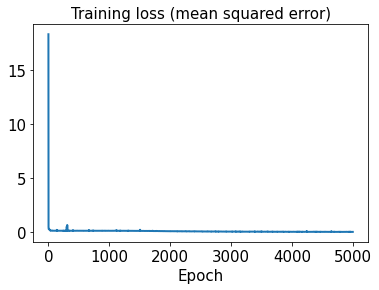

In [37]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

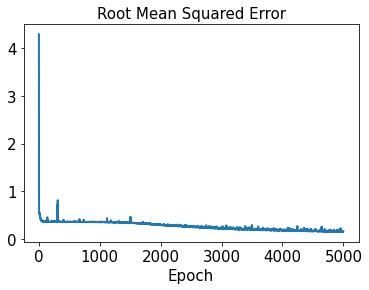

In [38]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [39]:
test_results = sd.evaluate([out_train,aa_train])

11/11 [==============================] - 0s 2ms/step - loss: 6.3445e-06 - rmse: 0.0000e+00


In [40]:
decoded_train = sd.predict([out_train,aa_train])

11/11 [==============================] - 0s 2ms/step


In [41]:
decoded_test = sd.predict([out_test, aa_test])

15/15 [==============================] - 0s 2ms/step


In [42]:
error_train_abs = np.abs(decoded_train - y_train)

In [43]:
error_test_abs = np.abs(decoded_test - y_test)

In [44]:
l2_error_train = np.sqrt(np.sum((decoded_train - y_train)**2) / np.sum(y_train**2))
print(l2_error_train)

0.029849737079629724


In [45]:
l2_error_test = np.sqrt(np.sum((decoded_test - y_test)**2) / np.sum(y_test**2))
print(l2_error_test)

0.14126141697172706


In [46]:
l2_error_train_list = []
for i in range(0, len(aa_train)):
    l2_error_train_data = np.sqrt(np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2))
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.015401972107160197, 0.02155342483060967, 0.0280095737648388, 0.018401154410809778, 0.02601616826293991, 0.033117400861545195, 0.02598192755556472, 0.023349721441912313, 0.026365161273179227, 0.02561112208478575, 0.028328399733179594, 0.026397631702140698, 0.026232019969284964, 0.023927554201105806, 0.022538566504100608, 0.014363184518052845, 0.01761725875562088, 0.024155345015796654, 0.017556019500295363, 0.02481361020207862, 0.024898248905300676, 0.01813112286152515, 0.02164447139390926, 0.015661809542531113, 0.014471116386819707, 0.014023046892541401, 0.03414055508442444, 0.05715214179181563, 0.03445749763802676, 0.01417818342898882, 0.014494075559592446, 0.02529923663486625, 0.030150762219373795, 0.029049016281391265, 0.029451750547302282, 0.029134593272488667, 0.02630407089604091, 0.021687766908546156, 0.016567121735248082, 0.020163877414486314, 0.016082061075820817, 0.01982430704440089, 0.019749577919800775, 0.011528306894014378, 0.04794142523923877, 0.0287030441137535, 0.02039

In [47]:
l2_error_test_list = []
for i in range(0, len(aa_test)):
    l2_error_test_data = np.sqrt(np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2))
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.17647393932945502, 0.17605652979116676, 0.1554998564888997, 0.14345921811372936, 0.1644466115279962, 0.15433209647946852, 0.1421113263524817, 0.10667571656253542, 0.1439072166702193, 0.1456654361776065, 0.14292234939633616, 0.1189912685326095, 0.14203028460716313, 0.12824407742672733, 0.10714906576603958, 0.08795160184415277, 0.09361856756582781, 0.17148593807676385, 0.15184434165381944, 0.12360674330409038, 0.16947281271251177, 0.14187107785579742, 0.1361483114425068, 0.12013180706431452, 0.13224507831580515, 0.10841173660632758, 0.13498240455480115, 0.11977027958709761, 0.12285494388248644, 0.0966613026142416, 0.08293371697361991, 0.17581171374806207, 0.1690197824117546, 0.15126069945469875, 0.13625239657384022, 0.09666868556741808, 0.11419513479904016, 0.10128384722815037, 0.08564456487279316, 0.15889226233613538, 0.13440184260132298, 0.11611122819736902, 0.09801293497253272, 0.07645782725939973, 0.16459160896062183, 0.1532774391777553, 0.12745467248794515, 0.14858643823925471, 0

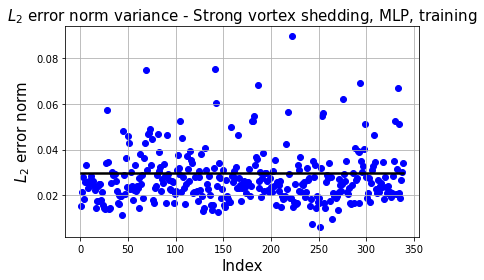

In [48]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Strong vortex shedding, MLP, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

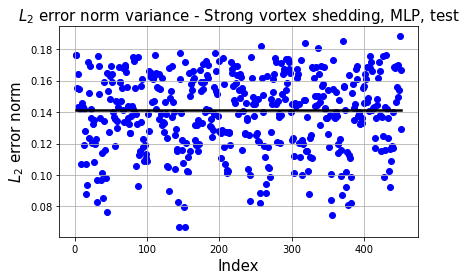

In [49]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Strong vortex shedding, MLP, test', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

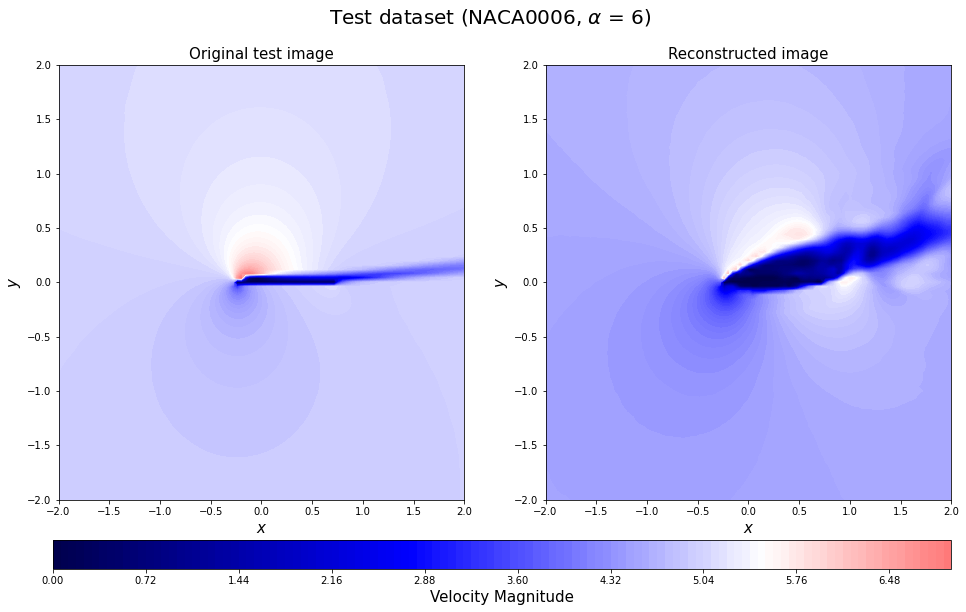

In [50]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_test[2].reshape(n_grid,n_grid)
decoded_rotate = decoded_test[2].reshape(n_grid,n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset (%s, $\alpha$ = %d)' %(np.array2string(geo_test[2])[2:-2], aa_test[2]),fontsize=20)
plt.show()

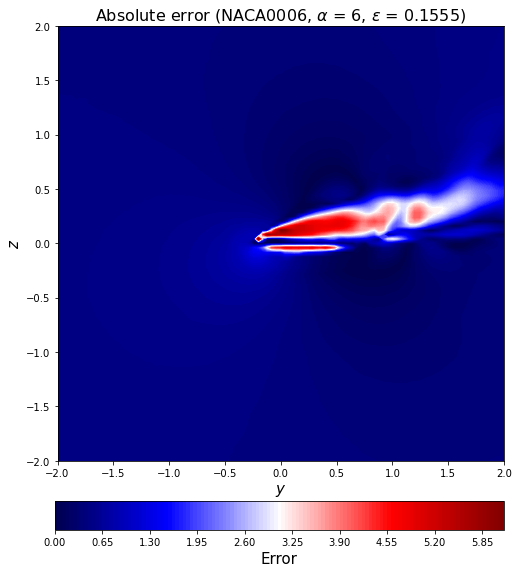

In [51]:
error_test_abs2_rotate = error_test_abs[2].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_test[2])[2:-2],
                                                                       aa_test[2], l2_error_test_list[2]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

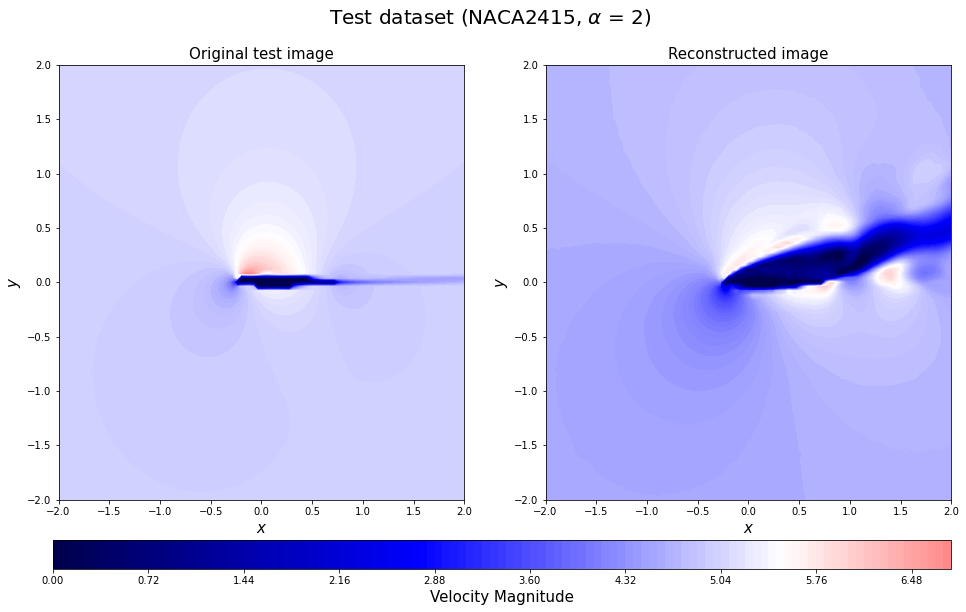

In [52]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_test[104].reshape(n_grid,n_grid)
decoded_rotate = decoded_test[104].reshape(n_grid,n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset (%s, $\alpha$ = %d)' %(np.array2string(geo_test[104])[2:-2], aa_test[104]),fontsize=20)
plt.show()

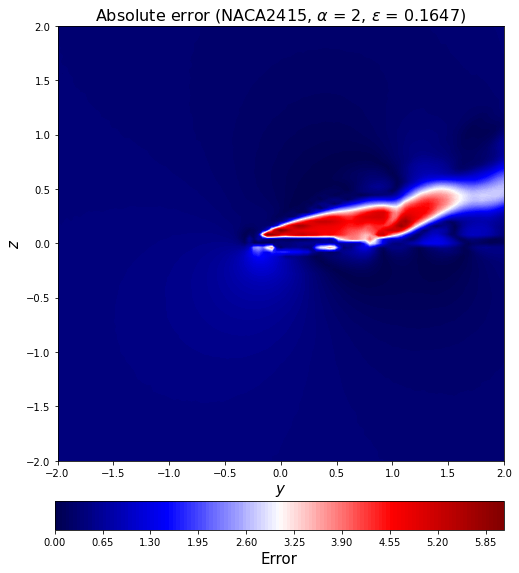

In [53]:
error_test_abs2_rotate = error_test_abs[104].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_test[104])[2:-2],
                                                                       aa_test[104], l2_error_test_list[104]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

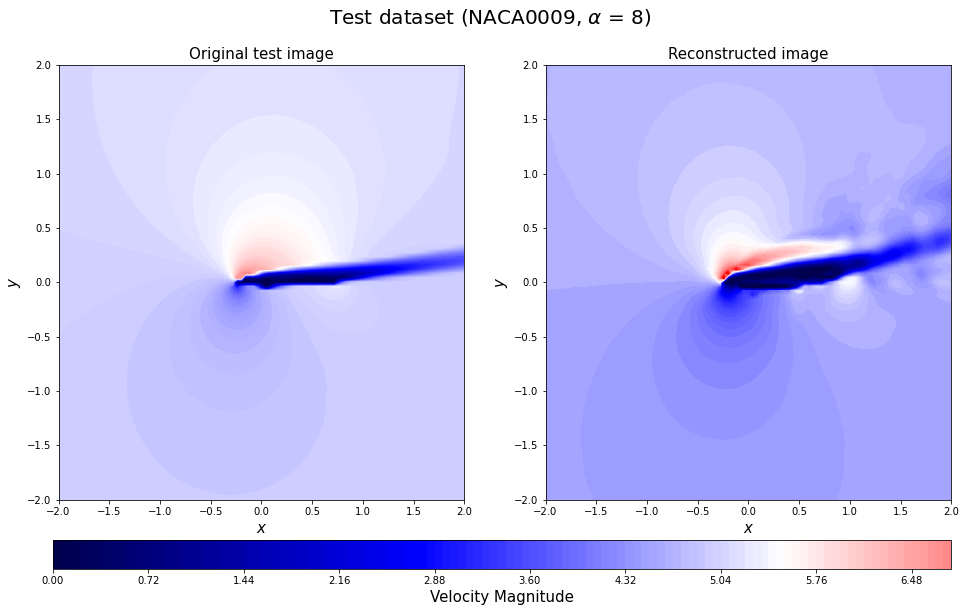

In [54]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_test[11].reshape(n_grid,n_grid)
decoded_rotate = decoded_test[11].reshape(n_grid,n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, levels=128, vmin=0, vmax=11, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, vmin=0, vmax=11, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset (%s, $\alpha$ = %d)' %(np.array2string(geo_test[11])[2:-2], aa_test[11]),fontsize=20)
plt.show()

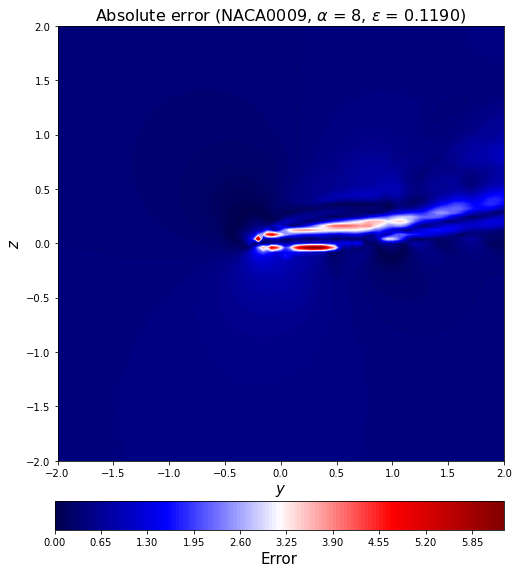

In [55]:
error_test_abs2_rotate = error_test_abs[11].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_test[11])[2:-2],
                                                                       aa_test[11], l2_error_test_list[11]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

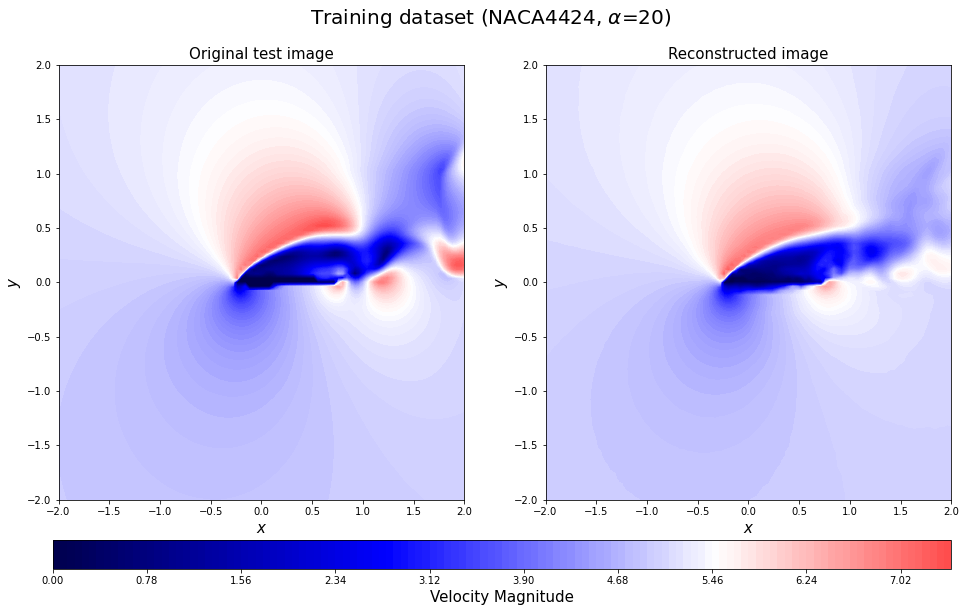

In [56]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_train[104].reshape(n_grid, n_grid)
decoded_rotate = decoded_train[104].reshape(n_grid, n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset (%s, $\alpha$=%d)' %(np.array2string(geo_train[104])[2:-2], aa_train[104]),fontsize=20)
plt.show()

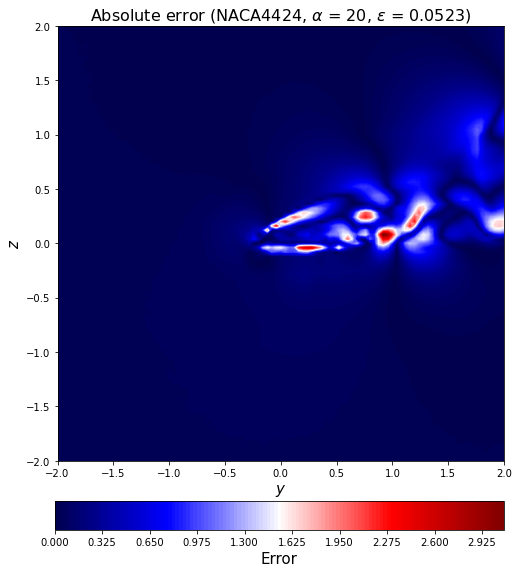

In [57]:
error_train_abs2_rotate = error_train_abs[104].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_train[104])[2:-2],
                                                                       aa_train[104], l2_error_train_list[104]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [58]:
np.max(y_test)

8.81117404763201

In [59]:
np.min(y_test)

0.0

In [60]:
np.max(y_train)

11.266911902998

In [61]:
np.min(y_train)

0.0

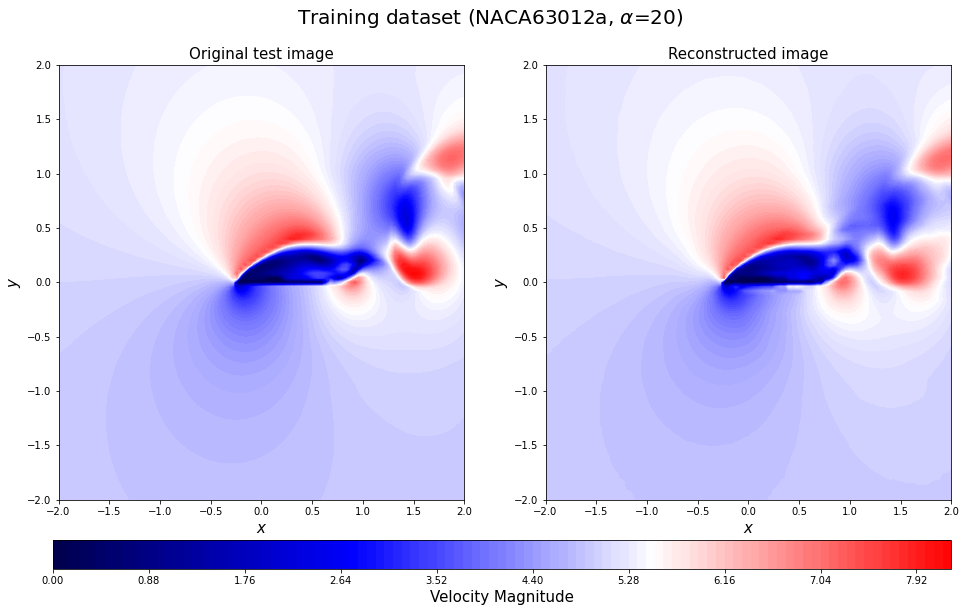

In [62]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_train[-190].reshape(n_grid, n_grid)
decoded_rotate = decoded_train[-190].reshape(n_grid, n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset (%s, $\alpha$=%d)' %(np.array2string(geo_train[-190])[2:-2], aa_train[-190]),fontsize=20)
plt.show()

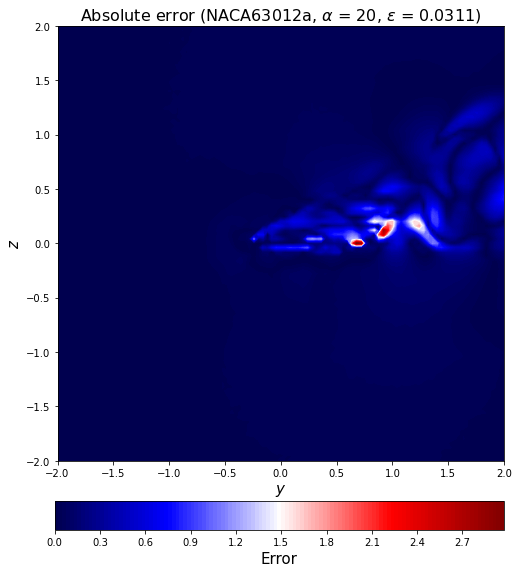

In [63]:
error_train_abs2_rotate = error_train_abs[-190].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_train[-190])[2:-2],
                                                                       aa_train[-190], l2_error_train_list[-190]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()